In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
diamonds.shape

(53940, 11)

In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
diamonds.isnull().values.sum()

0

In [8]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:>

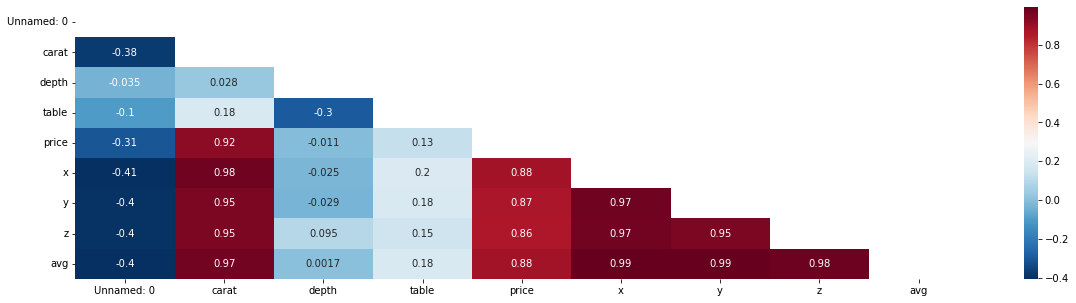

In [231]:
mask = np.zeros_like(diamonds.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))
sns.heatmap(diamonds.corr(),cmap='RdBu_r',mask=mask, annot=True)

### Assumption - 1
Diamond with best clarity is the most expensive one.

### Result
Based on the plot our hypothesis is wrong here, SI2 is the one highest in price.

In [255]:
price_clarity = diamonds.groupby(['clarity'])['price'].mean()
price_clarity

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64

[Text(0.5, 1.0, 'Diamond price based on clarity')]

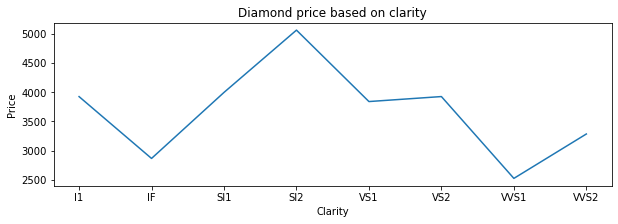

In [256]:
fig, ax = plt.subplots()
price_clarity.plot(kind='line', figsize=(10,3), ax=ax)
#ax.legend(["Price range"])
ax.set_ylabel("Price")
ax.set_xlabel("Clarity")
ax.set(title="Diamond price based on clarity")

### Assumption - 2
The diamond with the premium cut is the one highest in price

### Result 
Based on the graph our assumption is right, price of premium cut diamond is the highest

In [257]:
price_cut = diamonds.groupby(['cut'])['price'].mean()

[Text(0.5, 1.0, 'Diamond price based on cut')]

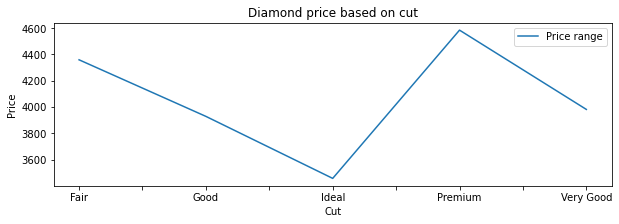

In [258]:
fig, ax = plt.subplots()
price_cut.plot(kind='line', figsize=(10,3), ax=ax)
ax.legend(["Price range"])
ax.set_ylabel("Price")
ax.set_xlabel("Cut")
ax.set(title="Diamond price based on cut")

### Assumption - 3
Based on the information, D - color being the best should be highest in price and J - color being the worst should be lowest in price

### Result
From the graph, we can conclude that I is the one having maximum price and D being lowest in price.

In [239]:
price_color_min = diamonds.groupby(['color'])['price'].min()
price_color_max = diamonds.groupby(['color'])['price'].max()

[Text(0.5, 1.0, 'Diamond price based on color')]

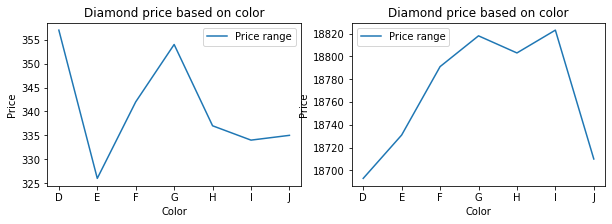

In [243]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)
price_color_min.plot(kind='line', figsize=(10,3), ax=ax[0])
ax[0].legend(["Price range"])
ax[0].set_ylabel("Price")
ax[0].set_xlabel("Color")
ax[0].set(title="Diamond price based on color")

price_color_max.plot(kind='line', figsize=(10,3), ax=ax[1])
ax[1].legend(["Price range"])
ax[1].set_ylabel("Price")
ax[1].set_xlabel("Color")
ax[1].set(title="Diamond price based on color")

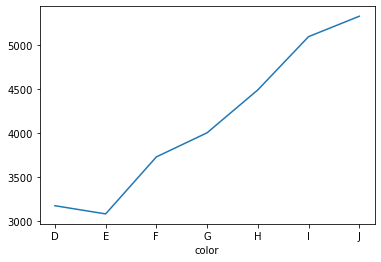

In [262]:
price_color = diamonds.groupby(['color'])['price'].mean().plot(kind = "line")

### Assumption - 4
As carat represent weight of the diamond, we can assume that weight is directly proportional with the price of the diamond.

### Result
The weight is proportional to the diamond till certain limit after that it starts decreasing or remains stable

<AxesSubplot:xlabel='carat'>

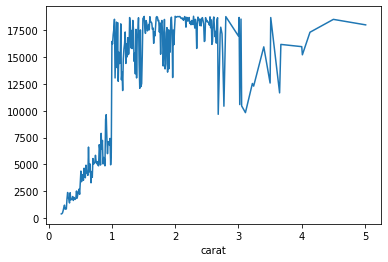

In [252]:
price_carat = diamonds.groupby(['carat'])['price'].max().plot(kind = "line")
price_carat

### Assumption - 5
Depth represent the height of the diamond, taller the diamond more is the price of the diamond.

### Result 
Based on the analysis, price of the diamond is maximum if it's height is between 55-70 , after that it price start reducing.

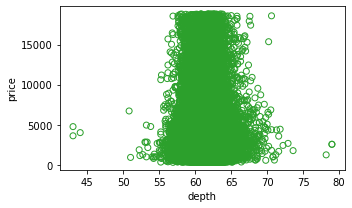

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(diamonds.depth, diamonds.price, color='C2', facecolor='none')
plt.xlabel('depth')
plt.ylabel('price')
plt.tight_layout()
plt.show()

### Assumption - 6
Based on the result of diamond's height, let's assume that price of diamond is maximum for the onw which has it's table length ranging from 55-70

### Result 
On the basis of the graph, our assumption is true.

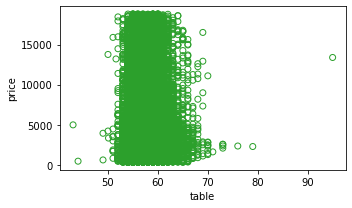

In [151]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(diamonds.table, diamonds.price, color='C2', facecolor='none')
plt.xlabel('table')
plt.ylabel('price')
plt.tight_layout()
plt.show()

### Assumption - 7
Based on the information , x- lenght , y- breadth, z - Height , Higher this value, higher  is the price

### Result 
From the plots we can, conclude that there are some diamonds having value of x,y and z cordinates between 1 and 0, are high in price.

In [273]:
diamonds["avg"] = diamonds[["x","y","z"]].mean(axis = 1)

Text(0.5, 0, 'avg')

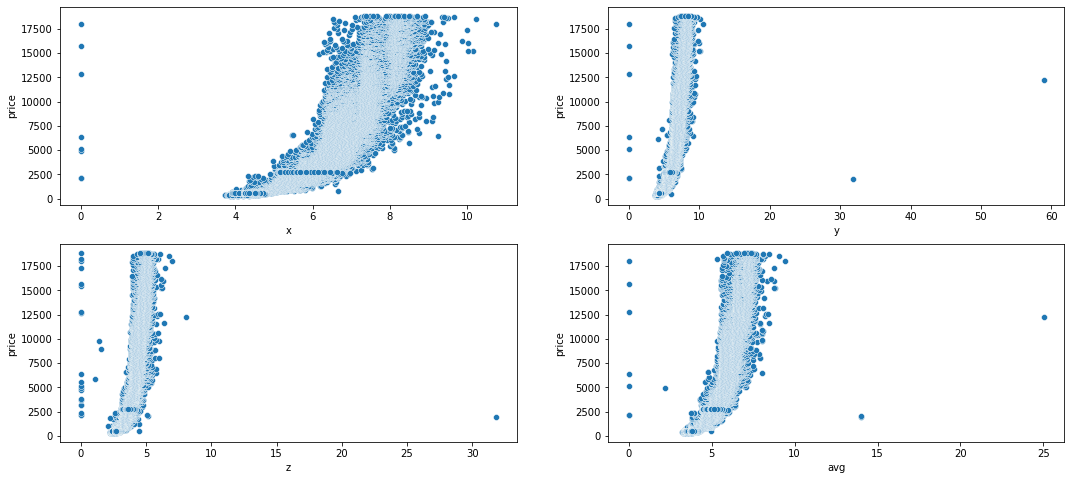

In [272]:
fig, axs = plt.subplots(2, 2, figsize=(18,8), sharex=False, sharey=False)

sns.scatterplot(x='x', y='price', data=diamonds, ax=axs[0][0])
axs[0][0].set_ylabel('price')
axs[0][0].set_title('')
axs[0][0].set_xlabel('x')

sns.scatterplot(x='y', y='price', data=diamonds, ax=axs[0][1])
axs[0][1].set_ylabel('price')
axs[0][1].set_title('')
axs[0][1].set_xlabel('y')

sns.scatterplot(x='z', y='price', data=diamonds, ax=axs[1][0])
axs[1][0].set_ylabel('price')
axs[1][0].set_title('')
axs[1][0].set_xlabel('z')

sns.scatterplot(x='avg', y='price', data=diamonds, ax=axs[1][1])
axs[1][1].set_ylabel('price')
axs[1][1].set_title('')
axs[1][1].set_xlabel('avg')

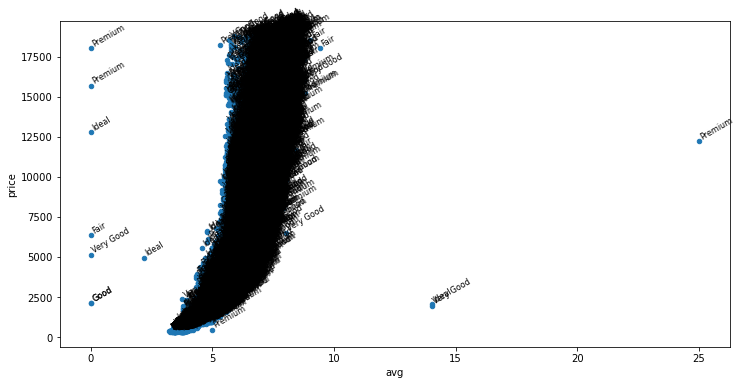

In [279]:
ax = diamonds.plot.scatter(x='avg', y='price', figsize=(12, 6))
points = diamonds[['avg','price','cut']]
_ = points.apply(
    lambda x: ax.text(*x, rotation=30, horizontalalignment='left', verticalalignment='bottom', fontsize=8), axis=1)
plt.show()

In [253]:
multiple = diamonds.groupby(['color','cut'])['price'].mean()

[Text(0.5, 1.0, 'Diamond price by cut and color')]

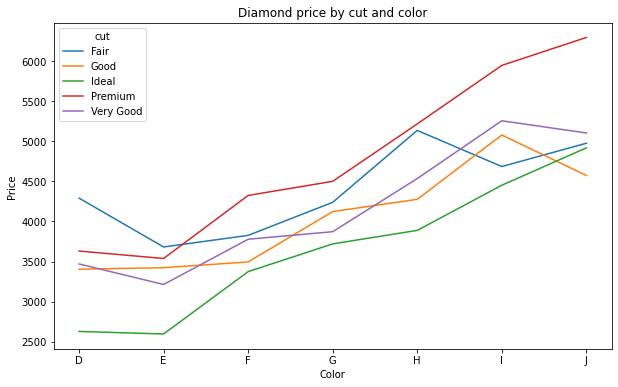

In [254]:
fig, ax = plt.subplots()
multiple.unstack().plot(kind='line', figsize=(10,6), ax=ax)
ax.set_ylabel("Price")
ax.set_xlabel("Color")
ax.set(title="Diamond price by cut and color")

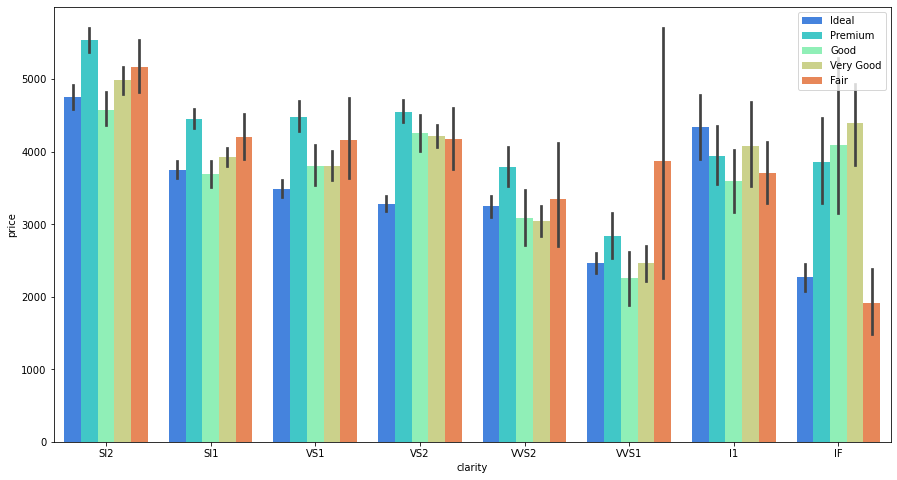

In [267]:
plt.figure(figsize=(15,8))
sns.barplot(x='clarity',y='price',data=diamonds, palette='rainbow', hue='cut')
plt.legend(loc = 'upper right')

### Analysis 
Diamonds with SI1 clarity are moslty high in price especiallly for color I and J. WS1 clarity is cheaper in price. IF with color D have many pricing options avaliable.

<AxesSubplot:xlabel='clarity', ylabel='price'>

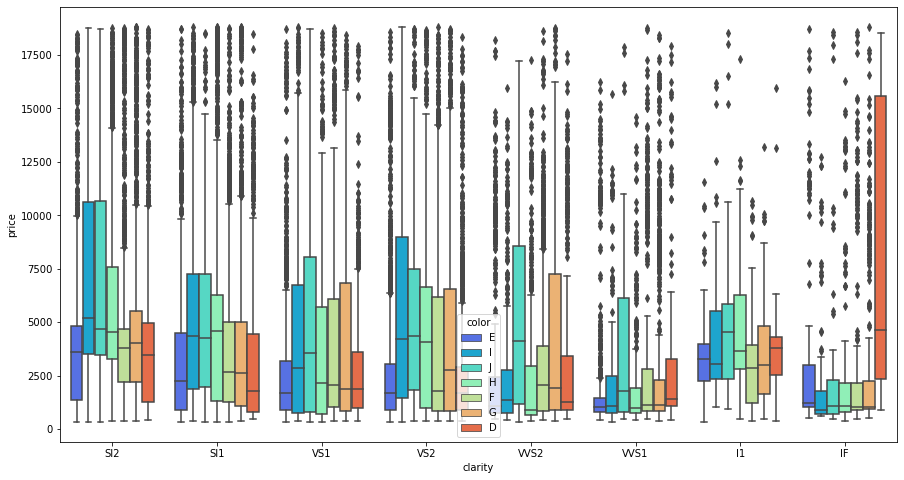

In [270]:
plt.figure(figsize=(15,8))
sns.boxplot(x='clarity',y="price",data=diamonds, hue='color', palette='rainbow')

### Conclusion 
Based on the various analysis from the various graph, we can conclude that price of diamond depends on its carat, color and dimensions.
Diamonds having dimensions within certain range are higher in price than the one which are very huge.